enter the length of box20
enter the number of bins100
box_half is 10.0
29991
29952


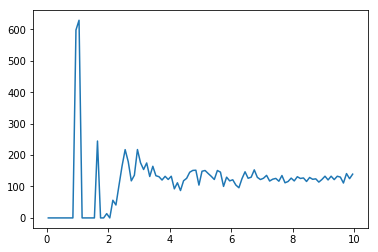

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import math 
import os
import statistics
rdf = {}
f = open ("/home/arunima693/arunima/python_files/dump2.file", "r")
size = int(input("enter the length of box"))
bins = int(input("enter the number of bins"))
box_half = size * 0.5
print("box_half is " + str(box_half))
list1 = []
list2 = []
list3 = []
bin_width =  box_half / bins
hist = [0]* (bins + 1)


for line in f:
  list =  line.split()
  if(len(list) !=6):
    continue
  else:
    list1.append(list) 
print(len(list1))
for i in range(len(list1)):
 if("ITEM:" in list1[i]):
    continue
 else:
    list2.append(list1[i])
print(len(list2))
n_config = 0
#frames 
n_frame =  len(list2) // 768
part_total = 0


# 5000 frames are present in the file
for i in range(n_frame): # frame counting loop
    l = len(list2)
    part_total = part_total + l
    for j in range(0,768,3):
      x = list2[i][3]
      y = list2[i][4]
      z = list2[i][5]
      counter = -1
      for k in range(2,768):
        counter = counter + 1
        if(counter ==2):
          counter = 0
          continue
        #print(i,j,k)
        xx = float(x) - float(list2[k][3])
        yy = float(y) - float(list2[k][4])
        zz = float(z) - float(list2[k][5])
        if(xx > box_half):
          xx = xx - size       
        if (xx < -box_half):
         xx =  xx + size
        if(yy > box_half):
         yy = yy - size
        if (yy < -box_half):
         yy =  yy + size
        if(zz > box_half):
          zz = zz - size
        if (zz < -box_half):
          zz =  zz + size
       # distance between i and j
        rd  = xx * xx + yy * yy + zz * zz
       #print("no change of value")
        rij = math.sqrt(rd)
        list3.append(rij)
        box = int(math.ceil(rij/bin_width)) # determine in which bin the distance falls
        if (box <= bins):
           hist[box] += 1
        #print(j,k)
    n_config = n_config + 1

# Normalization 

avg_part = part_total / float(n_config)
rho = avg_part/pow(size, 3.0)# Density

for i in range(1, bins+1):
  r = (i - 0.5) * bin_width
  r_bin =  ((r+bin_width)*(r+bin_width)*(r+bin_width))
  r3 =   (r*r*r)
  n_id1 = r_bin - r3
  n_id2 = (4 / 3) * math.pi * n_id1
  n_id = n_id2 * rho
  val = hist[i] / n_id
  rdf.update({r:val})
#print(rdf)
plt.plot(rdf.keys(),rdf.values())
plt.show()



























